# Second part: Descriptive diagrams

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [5]:
df_CA = pd.read_excel('CA.xlsx')
df_GB = pd.read_excel('GB.xlsx')
df_US = pd.read_excel('US.xlsx')

In [6]:
df_CA.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


# 每种视频分类的播放量、评论数、点赞数、点踩数排名

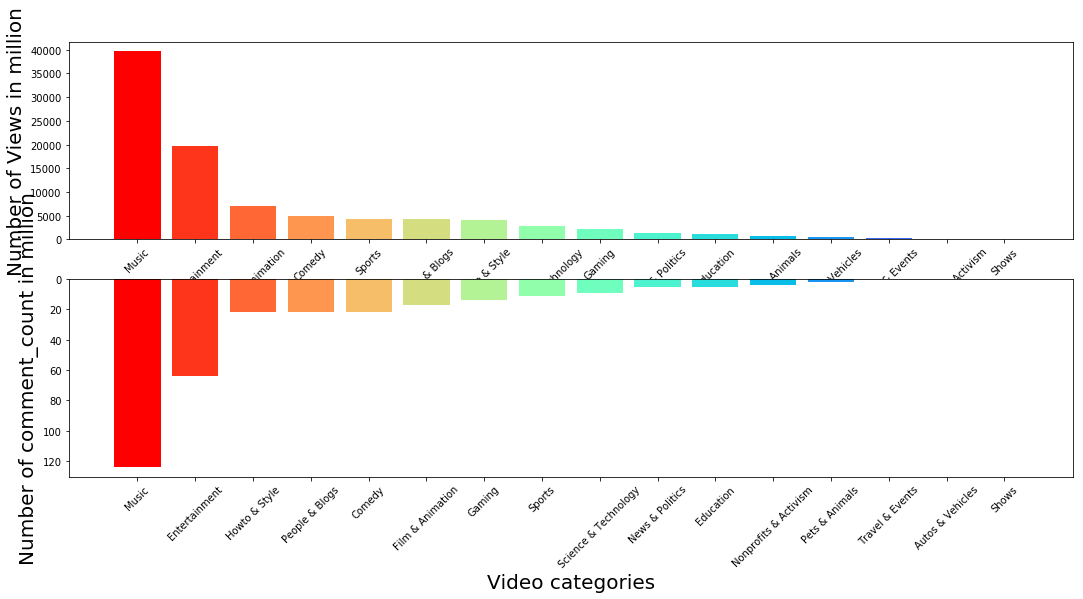

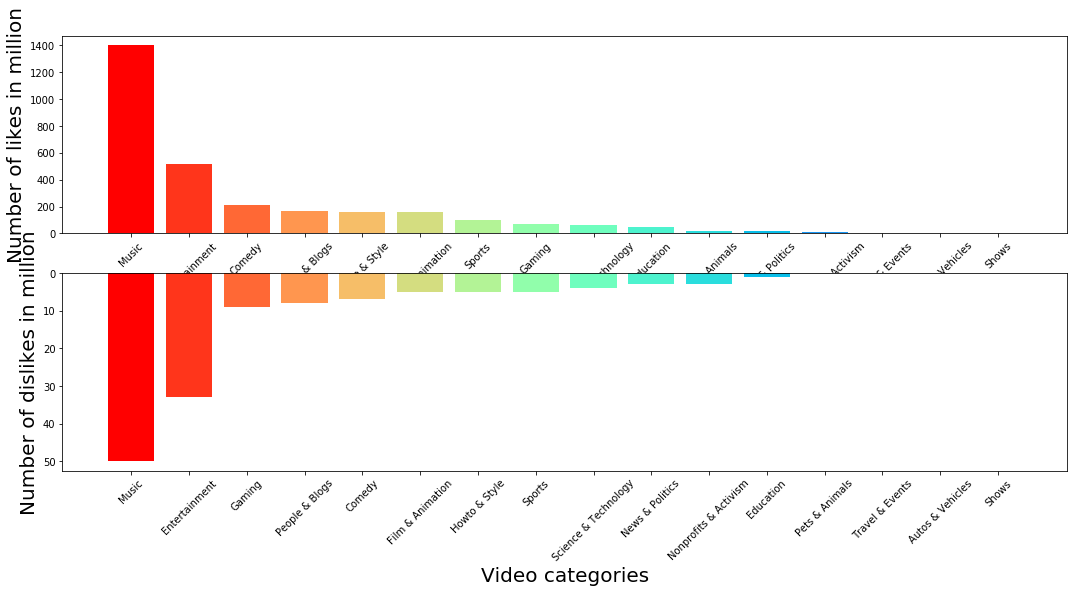

In [68]:
# 美国
views_perc = df_US.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_US.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_US.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_US.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('rainbow')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

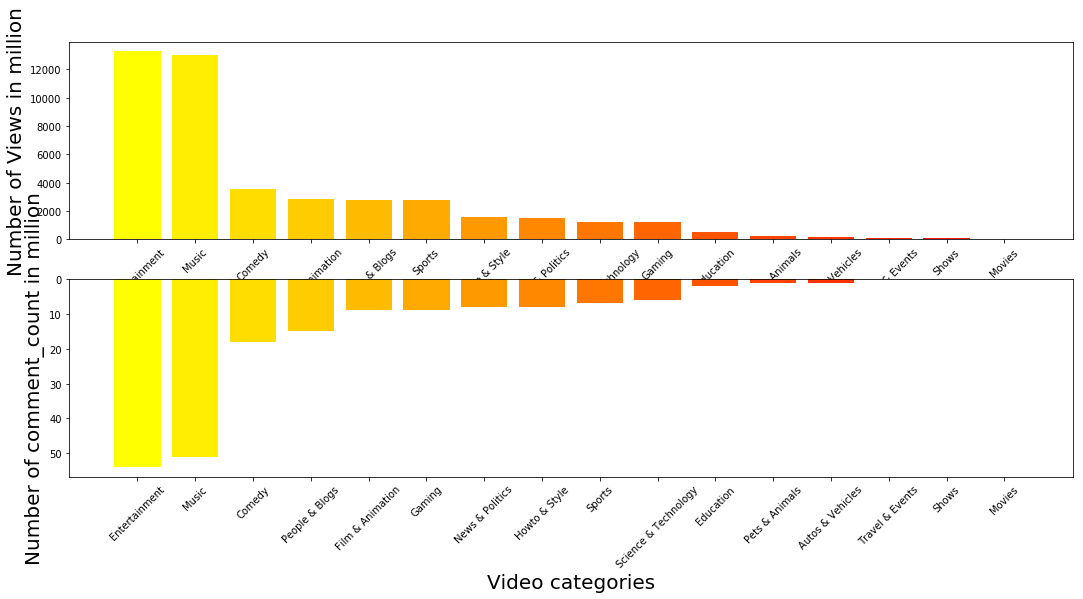

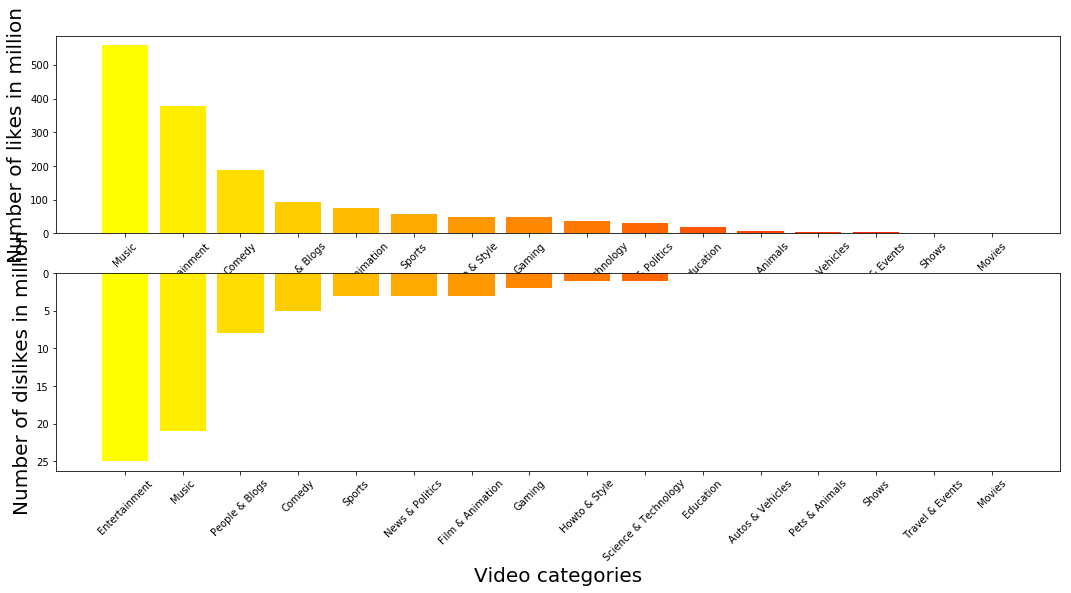

In [69]:
# 加拿大
views_perc = df_CA.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_CA.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_CA.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_CA.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('autumn')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

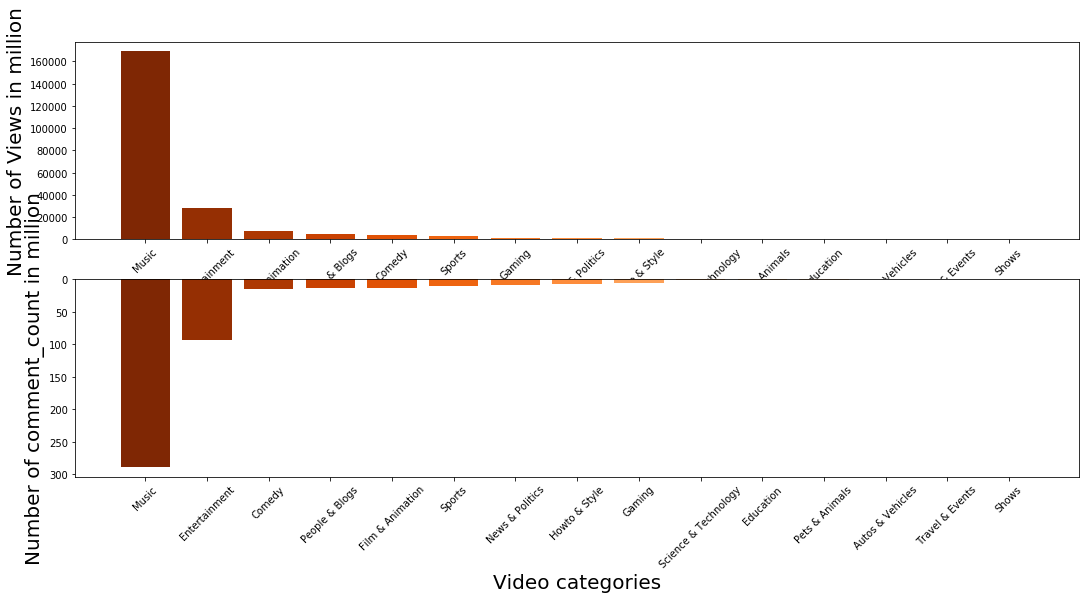

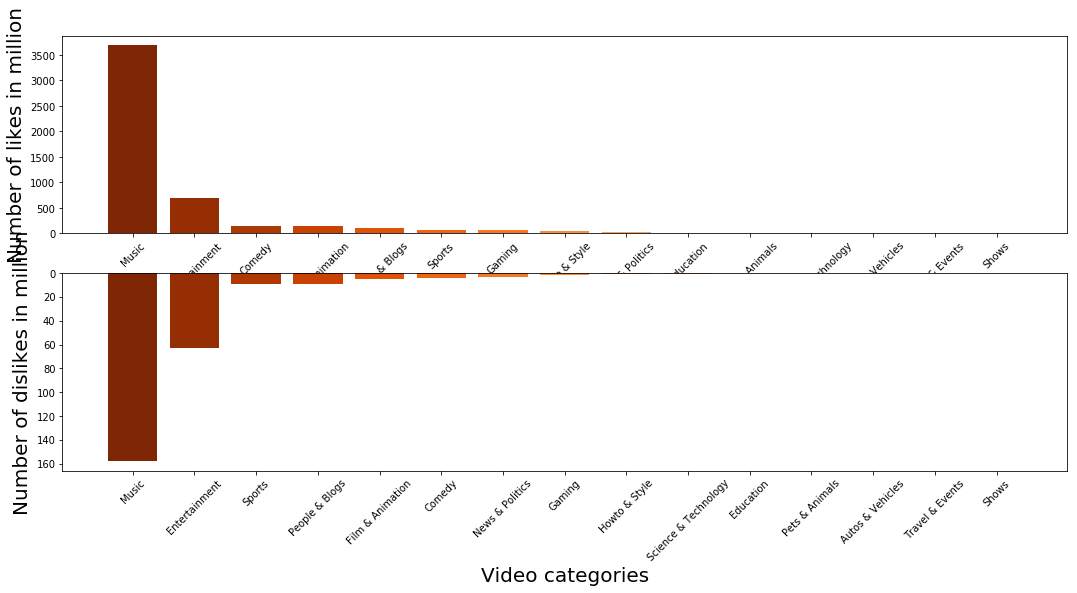

In [31]:
# 英国
views_perc = df_GB.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_GB.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_GB.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_GB.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('Oranges')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

### 图中分别描述了三个国家各视频分类的播放量、评论数、点赞数、点踩数排名。可以看出播放量、评论数、点赞数、点踩数四个数据都呈现正相关性，播放量高的视频会有高评论数和点赞数，同时标记不喜欢的人也会更多。三个国家的喜好有一定的一致性。音乐和娱乐类视频都有领先的数据，美国与英国都是音乐类视频第一，娱乐类视频第二；而加拿大是娱乐类视频第一，音乐类视频第二。

# 视频发布至上榜用时排名

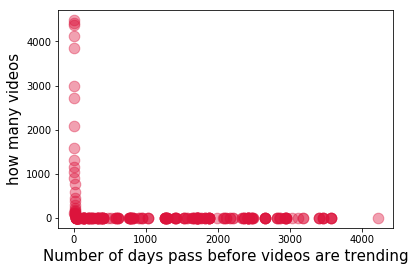

In [60]:
#美国
df_US['day_use'] = (df_US['trending_date'] - df_US['publish_date']).dt.days  #计算上榜用时天数
df_count =df_US['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2  #圆圈大小

plt.scatter(days, count, s=area, c=colors2, alpha=0.4)  #散点图

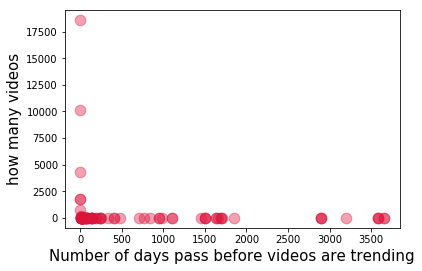

In [61]:
#加拿大
df_CA['day_use'] = (df_CA['trending_date'] - df_CA['publish_date']).dt.days  #计算上榜用时天数
df_count =df_CA['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2 

plt.scatter(days, count, s=area, c=colors2, alpha=0.4) 

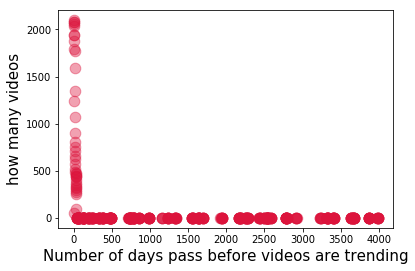

In [64]:
#英国
df_GB['day_use'] = (df_GB['trending_date'] - df_GB['publish_date']).dt.days  #计算上榜用时天数
df_count =df_GB['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2

plt.scatter(days, count, s=area, c=colors2, alpha=0.4) 

### 通过散点图，展现了各个国家上榜视频从发布至上榜所需要的时间。可以看出榜单中的视频，从发布到上榜所需的时间差距非常大，从当日上榜到几年不等。但是绝大部分上榜视频从发布之初就受到欢迎，这一点在美国和德国的上榜视频中最为明显。（由于视频从发布至上榜所需要的时间差距太大，X轴每单位为500天，而绝大部分的上榜视频所需天数是个位数，所以Y轴有很大重叠）

# 上榜视频当日发布时间分布

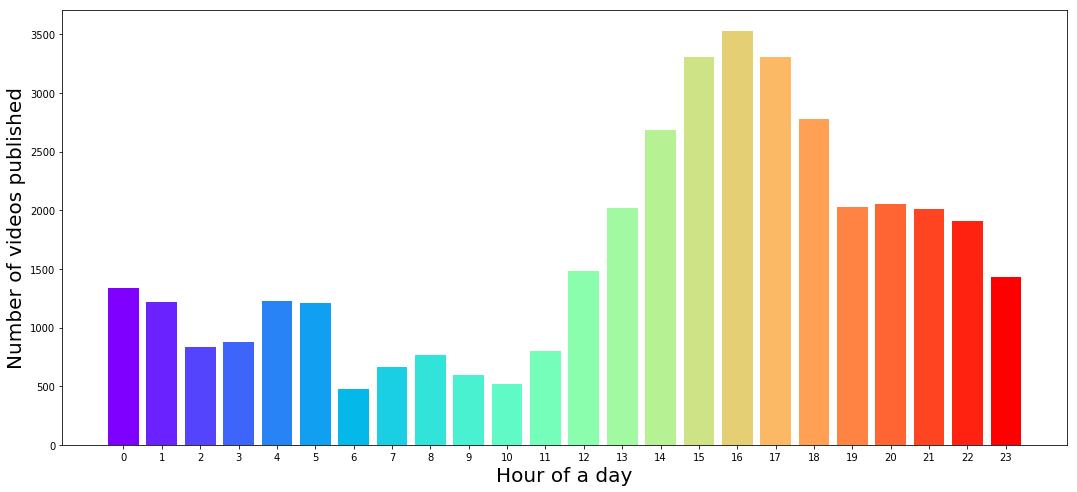

In [70]:
#美国
df_US['hours'] = df_US['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_US['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('rainbow')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

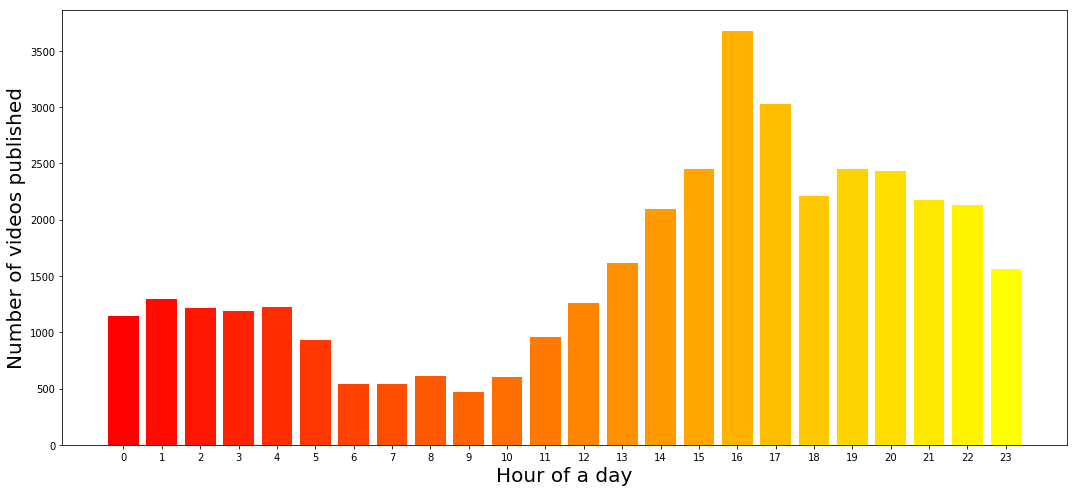

In [71]:
#加拿大
df_CA['hours'] = df_CA['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_CA['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('autumn')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

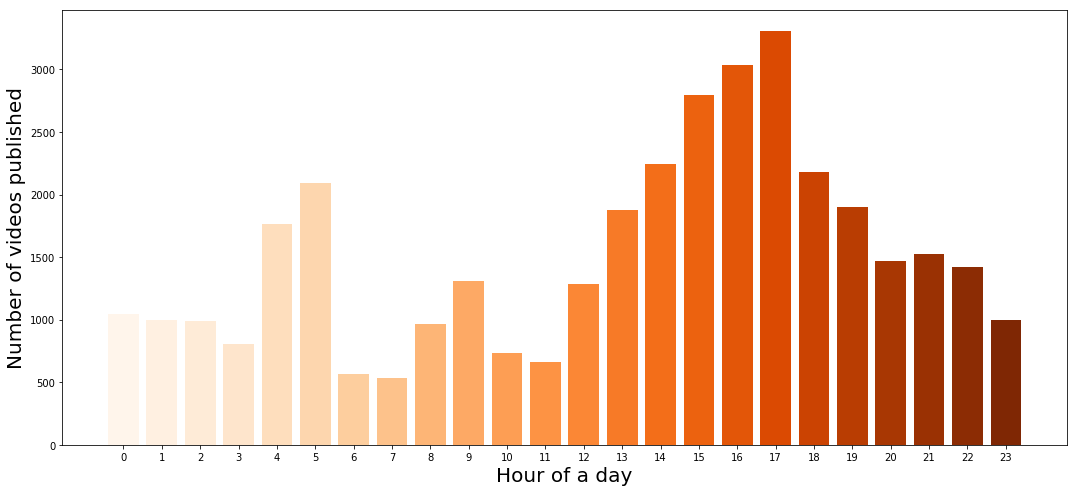

In [73]:
#英国
df_GB['hours'] = df_GB['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_GB['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('Oranges')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

### 图中描述了各国上榜视频在发布当天选择的时间段。可以看出三个国家发布视频最多的时间段都是在下午4点至5点，大部分上榜视频发布在傍晚，在早上6点至10点的视频发布数量最少。这说明视频的发布时间会对其传播有一定的影响。另外，进一步推测，如果视频的发布时间反应了人们更有可能在休闲娱乐的时间段，三个国家的上榜视频发布的时间段分布有相似性，那么说明他们的国民生活规律也有一定相似性，放松观看视频的时间比较接近。（英国的上榜视频中，发布在凌晨4-5点的视频数相对较多，可能英国人比美国人加拿大人晚睡。）